<a href="https://colab.research.google.com/github/zd341/Kaggle-Competition-Titanic-Learning-From-Disaster/blob/main/titanic_learning_from_disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Titanic Learning from Disaster

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

# Data Importing & Inspection

### Importing Data

In [6]:
# Loading Data
train= pd.read_csv('/content/drive/MyDrive/data/KAGGLE COMPETITION/train.csv')
test = pd.read_csv('/content/drive/MyDrive/data/KAGGLE COMPETITION/test.csv')
gender_submission = pd.read_csv('/content/drive/MyDrive/data/KAGGLE COMPETITION/gender_submission.csv')

# Creating a Split for Passenger Id
test_ids = test['PassengerId']

### Joining Dataset 

In [7]:

test = test.merge(gender_submission, on='PassengerId', how='left')

### Inspecting Dataset

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Getting Columns and Shapes

In [9]:
train.columns, train.shape

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'), (891, 12))

### Getting Information about Datatypes

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Type Conversion

In [11]:
train[['Survived','Pclass','Sex','SibSp','Embarked']] = train[['Survived','Pclass','Sex','SibSp','Embarked']].astype('category')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Describe Numerical Features

In [12]:
train[['Age','Fare']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Checking Value Counts for Passengers That Survived

In [13]:
print(train['Survived'].value_counts() / len(train) * 100)

0    61.616162
1    38.383838
Name: Survived, dtype: float64


### Checking Value Counts for Passenger Class

In [14]:
print(train['Pclass'].value_counts() / len(train) * 100)

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


### Checking Value Counts for Passengers Gender

In [15]:
print(train['Sex'].value_counts() / len(train) * 100)

male      64.758698
female    35.241302
Name: Sex, dtype: float64


### Checking Value Counts for For Place of Embarkment

In [16]:
print(train['Embarked'].value_counts() / len(train) * 100)

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


# Data Cleaning & Preparation

## Removing Missing Rows From Training and Test Sets

**Data Quality Issues**

* Return for Imputation
* Get Histogram to estimate distribution of Missing Ages 
* Thinking about missingness in terms of whether the data is missing at random
* Deal with missingness 
* Converting Categories into Numerical Data 




### Getting Information about Missing Data Types 

In [17]:
train['Age'].isna().sum(), test['Age'].isna().sum()

(177, 86)

In [18]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Proportion of Missing Data

In [19]:
(train.isna().sum()) / len(train) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [20]:
def missing(df):
    na = df.isna().sum()/ len(df)
    na = na[na >0].sort_values()
    return na
    

In [21]:
missing_dat_train = missing(train)

### Visualising Missing Data

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

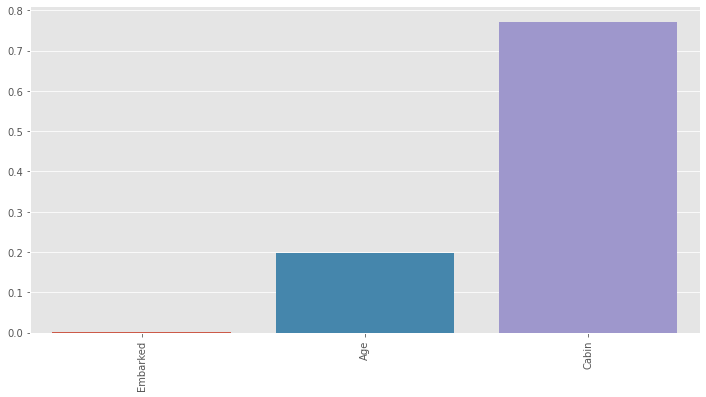

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x=missing_dat_train.index, y=missing_dat_train)
plt.xticks(rotation=90)

In [23]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


> Drop Two Rows of Embarked Data

In [24]:
train= train.dropna(axis=0, subset=['Embarked'])
missing_dat_train = missing(train)

> Drop Cabin Variable to reduce its impact on overall outcome

In [25]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

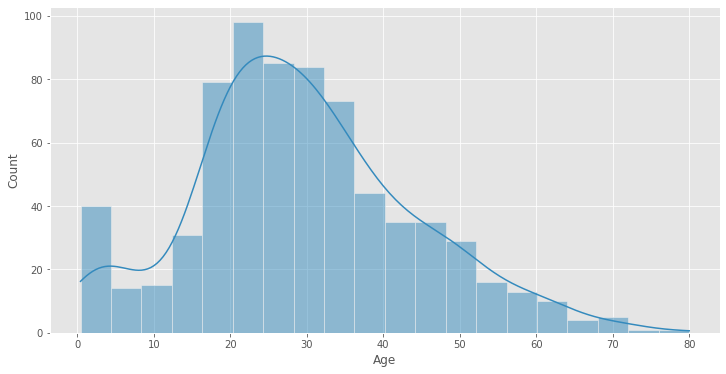

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(x='Age',data=train,kde=True)
plt.show()

### Imputing Missing Data Ages of Passengers

In [27]:
train['Age']= train.loc[:,['Age']].fillna(train.loc[:,['Age']].median())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Dropping Values for Missing Cabins

In [28]:
train = train.drop('Cabin',axis=1)

### Verifying How Much Missing Data is Present in Training Set

In [29]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

> All missing values have been removed

In [30]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [31]:
test.isna().sum()/ len(test)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
Survived       0.000000
dtype: float64

In [32]:
missing_dat = missing(test)

In [33]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


In [34]:
test['Age'] = test['Age'].fillna(test['Age'].median())

In [35]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [36]:
test = test.drop('Cabin',axis=1)

In [37]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

# Exploring Data Analysis of Survival 

In [38]:
train['Survived'] = train['Survived'].astype('int64')

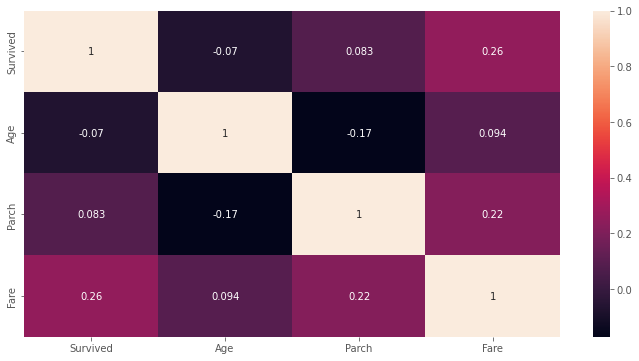

In [39]:
plt.figure(figsize=(12,6))
corr = train.iloc[:,1:].corr()

sns.heatmap(corr,annot=True)
plt.show()

In [40]:
train.corr()['Survived']

PassengerId   -0.005028
Survived       1.000000
Age           -0.069822
Parch          0.083151
Fare           0.255290
Name: Survived, dtype: float64

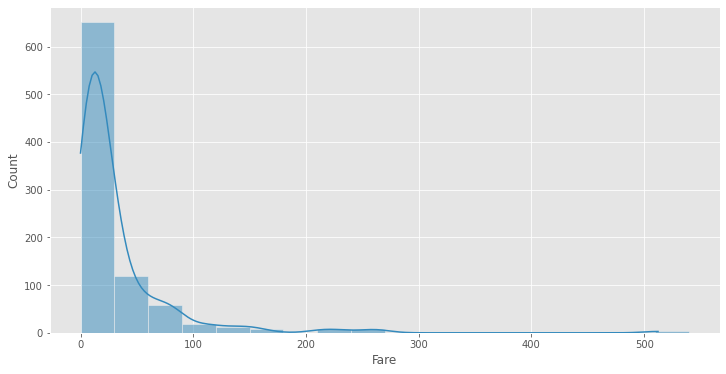

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(x=train.Fare ,data=train, binwidth=30,kde=True)
plt.show()

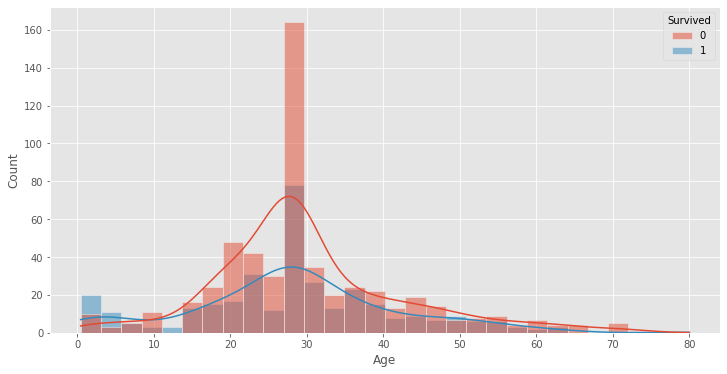

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(x='Age',data=train,kde=True,hue='Survived')
plt.show()

<Figure size 864x432 with 0 Axes>

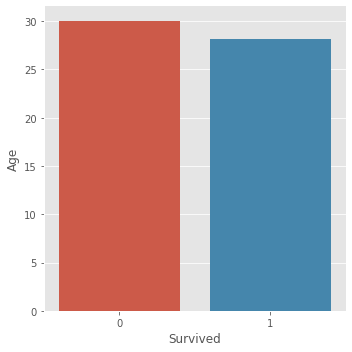

In [43]:
plt.figure(figsize=(12,6))
sns.catplot(x='Survived',y='Age' ,data=train,kind='bar',ci=False)
plt.show()

<Figure size 864x432 with 0 Axes>

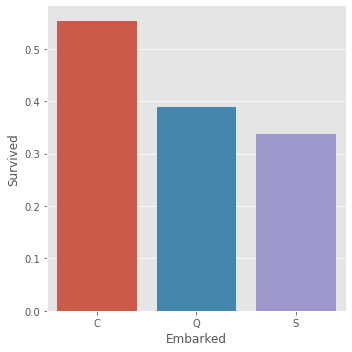

In [44]:
plt.figure(figsize=(12,6))
sns.catplot(x='Embarked',y='Survived',data=train,kind='bar',ci=False)
plt.show()

<Figure size 1080x720 with 0 Axes>

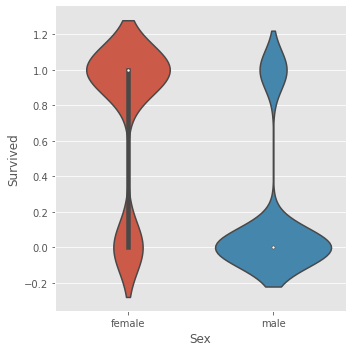

In [45]:
plt.figure(figsize=(15,10))
sns.catplot(x='Sex',y='Survived' ,data=train,kind='violin')
plt.show()

# Data Preparation Before Modelling

In [46]:
train_ml = train
test_ml = test
train_ml.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [47]:
from sklearn.preprocessing import LabelEncoder

# Instantiating Label Encoder
encoder = LabelEncoder()

# Instantiating Label Encoder
cols= ['Sex','Embarked']

# Fitting Label Encoder For Each Column
for col in cols:
    train_ml[col]= encoder.fit_transform(train_ml[col])
    test_ml[col]= encoder.fit_transform(test_ml[col])
    print(encoder.classes_)

['female' 'male']
['C' 'Q' 'S']


**Creating Input and Output Variables**

In [48]:
# Subset Dataset

train_ml = train_ml.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]
test_ml = test_ml.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]

# Preparing X_train, y_train

X_train = train_ml.drop('Survived',axis=1)
y_train = train_ml['Survived']

# Preparing X_test, y_test


X_test = test_ml.drop('Survived',axis=1)
y_test = test_ml['Survived']

# Machine Learning

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score,recall_score, precision_score, cohen_kappa_score
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle


In [50]:
scaler = StandardScaler()

X_train.iloc[:,[2,5]] = scaler.fit_transform(X_train.iloc[:,[2,5]])
X_test.iloc[:,[2,5]] = scaler.fit_transform(X_test.iloc[:,[2,5]])


In [51]:
# Shuffle Dataset to Ensure Random Ordering & Prevent Model From learning Pattersn related to Ordering
X_train, y_train= shuffle(X_train,y_train)

### Logistic Regression

In [52]:
%%time 
lr = LogisticRegression(C= 0.1, penalty = 'l2', solver= 'newton-cg',random_state=12)

lr.fit(X_train,y_train)

CPU times: user 21.2 ms, sys: 0 ns, total: 21.2 ms
Wall time: 22.7 ms


In [53]:
lr_predictions= lr.predict(X_test)

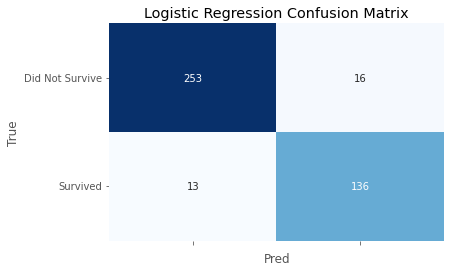

In [54]:
Survival = ['Did Not Survive','Survived']
# Initialise class names 
classes = np.unique(Survival)

# Display Confusion Matrix using Matplotlib

cm = confusion_matrix(lr_predictions, y_test)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True",xticklabels='',yticklabels=classes
       ,title="Logistic Regression Confusion Matrix")
plt.yticks(rotation=0)

plt.show()

In [55]:
print(classification_report(lr_predictions,y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       269
           1       0.89      0.91      0.90       149

    accuracy                           0.93       418
   macro avg       0.92      0.93      0.92       418
weighted avg       0.93      0.93      0.93       418



In [56]:
print(f"The accuracy for the logistic regression model is: {accuracy_score(lr_predictions,y_test):.3f}")
print(f"The f1 score for the logistic regression model is: {f1_score(lr_predictions,y_test):.3f}")
print(f"The recall score for the logistic regression model is: {recall_score(lr_predictions,y_test):.3f}")
print(f"The precision score for the logistic regression model is: {precision_score(lr_predictions,y_test):.3f}")
print(f"The Kappa score for the logistic regression model is: {cohen_kappa_score(lr_predictions,y_test):.3f}")

The accuracy for the logistic regression model is: 0.931
The f1 score for the logistic regression model is: 0.904
The recall score for the logistic regression model is: 0.913
The precision score for the logistic regression model is: 0.895
The Kappa score for the logistic regression model is: 0.849


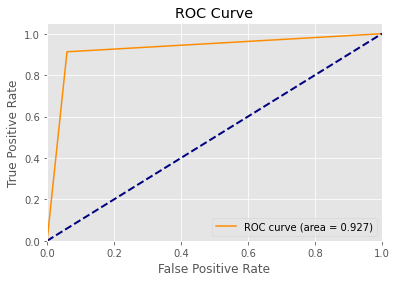

In [57]:
from sklearn.metrics import roc_curve, auc
fpr_3, tpr_3, _ = roc_curve(lr_predictions,y_test)
roc_auc_3 = auc(fpr_3, tpr_3)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr_3, tpr_3, color='darkorange', label='ROC curve (area = %0.3f)' % roc_auc_3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Decision Tree

In [58]:
%%time

dt = DecisionTreeClassifier(random_state=0)

dt.fit(X_train,y_train)

CPU times: user 6.23 ms, sys: 840 µs, total: 7.07 ms
Wall time: 8.24 ms


In [59]:

dt_predictions = dt.predict(X_test)

In [60]:
print(f"The accuracy for the decision tree classifier model is: {accuracy_score(dt_predictions,y_test):.3f}")
print(f"The f1 score for the decision tree classifier model is: {f1_score(dt_predictions,y_test):.3f}")
print(f"The recall score for the decision tree classifier model is: {recall_score(dt_predictions,y_test):.3f}")
print(f"The precision score for decision tree classifier model is: {precision_score(dt_predictions,y_test):.3f}")
print(f"The Kappa score decision tree classifier model is: {cohen_kappa_score(dt_predictions,y_test):.3f}")


The accuracy for the decision tree classifier model is: 0.677
The f1 score for the decision tree classifier model is: 0.597
The recall score for the decision tree classifier model is: 0.546
The precision score for decision tree classifier model is: 0.658
The Kappa score decision tree classifier model is: 0.331


In [61]:
print(classification_report(dt_predictions,y_test))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73       235
           1       0.66      0.55      0.60       183

    accuracy                           0.68       418
   macro avg       0.67      0.66      0.66       418
weighted avg       0.67      0.68      0.67       418



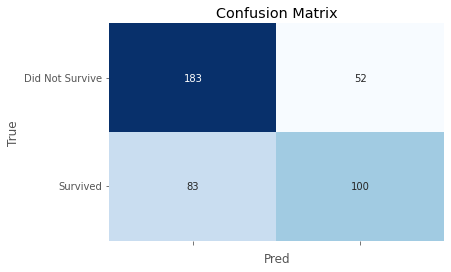

In [62]:
Survival = ['Did Not Survive','Survived']
# Initialise class names 
classes = np.unique(Survival)

# Display Confusion Matrix using Matplotlib

cm = confusion_matrix(dt_predictions, y_test)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True",xticklabels='',yticklabels=classes
       ,title="Confusion Matrix")
plt.yticks(rotation=0)

plt.show()

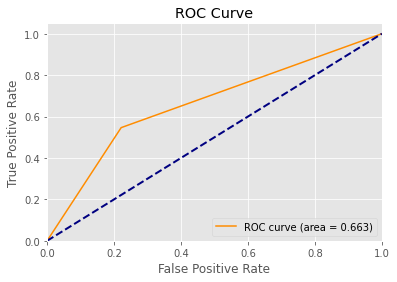

In [63]:
from sklearn.metrics import roc_curve, auc
fpr_2, tpr_2, _ = roc_curve(dt_predictions,y_test)
roc_auc_2 = auc(fpr_2, tpr_2)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr_2, tpr_2, color='darkorange', label='ROC curve (area = %0.3f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Random Forest Classifier

In [64]:
%%time

rf = RandomForestClassifier(random_state=0,n_estimators=2500)

rf.fit(X_train,y_train)

CPU times: user 5.38 s, sys: 84.9 ms, total: 5.46 s
Wall time: 5.49 s


In [65]:

rf_predictions = rf.predict(X_test)


In [66]:
print(f"The accuracy for the Random Forest classifier model is: {accuracy_score(rf_predictions,y_test):.3f}")
print(f"The f1 score for the Random Forest classifier model is: {f1_score(rf_predictions,y_test):.3f}")
print(f"The recall score for the Random Forest classifier model is: {recall_score(rf_predictions,y_test):.3f}")
print(f"The precision score for Random Forest classifier model is: {precision_score(rf_predictions,y_test):.3f}")
print(f"The Kappa score Random Forest model is: {cohen_kappa_score(rf_predictions,y_test):.3f}")

The accuracy for the Random Forest classifier model is: 0.804
The f1 score for the Random Forest classifier model is: 0.728
The recall score for the Random Forest classifier model is: 0.733
The precision score for Random Forest classifier model is: 0.724
The Kappa score Random Forest model is: 0.575


In [67]:
print(classification_report(rf_predictions,y_test))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       268
           1       0.72      0.73      0.73       150

    accuracy                           0.80       418
   macro avg       0.79      0.79      0.79       418
weighted avg       0.80      0.80      0.80       418



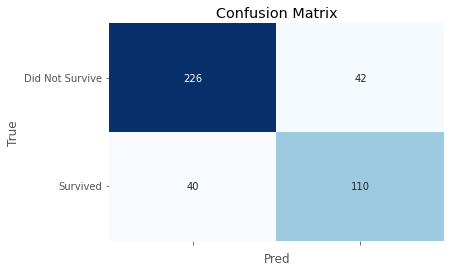

In [68]:
Survival = ['Did Not Survive','Survived']
# Initialise class names 
classes = np.unique(Survival)

# Display Confusion Matrix using Matplotlib

cm = confusion_matrix(rf_predictions, y_test)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True",xticklabels='',yticklabels=classes
       ,title="Confusion Matrix")
plt.yticks(rotation=0)

plt.show()

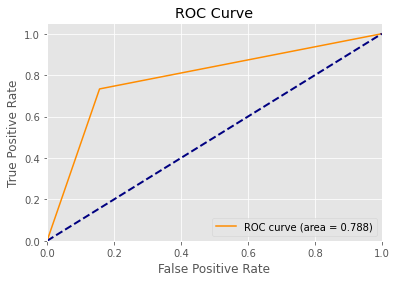

In [69]:
from sklearn.metrics import roc_curve, auc
fp1, tpr_1, _ = roc_curve(rf_predictions,y_test)
roc_auc_1 = auc(fp1, tpr_1)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fp1, tpr_1, color='darkorange', label='ROC curve (area = %0.3f)' % roc_auc_1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### SVM Classifier

In [70]:
%%time 

svc = SVC(random_state=0)

svc.fit(X_train,y_train)

CPU times: user 30.6 ms, sys: 0 ns, total: 30.6 ms
Wall time: 32.1 ms


In [71]:
svc_predictions = svc.predict(X_test)

In [72]:
print(f"The accuracy for the support vector classifier model is: {accuracy_score(svc_predictions,y_test):.4f}")
print(f"The f1 score for the support vector classifier model is: {f1_score(svc_predictions,y_test):.4f}")
print(f"The recall score for the support vector classifier model is: {recall_score(svc_predictions,y_test):.3f}")
print(f"The precision score for support vector classifier model is: {precision_score(svc_predictions,y_test):.3f}")
print(f"The Kappa score support vector classifier model is: {cohen_kappa_score(svc_predictions,y_test):.3f}")


The accuracy for the support vector classifier model is: 0.9545
The f1 score for the support vector classifier model is: 0.9377
The recall score for the support vector classifier model is: 0.935
The precision score for support vector classifier model is: 0.941
The Kappa score support vector classifier model is: 0.902


In [73]:
print(classification_report(svc_predictions,y_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       265
           1       0.94      0.93      0.94       153

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



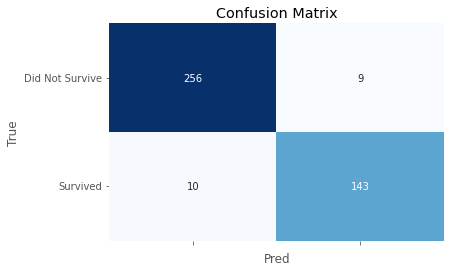

In [74]:
Survival = ['Did Not Survive','Survived']
# Initialise class names 
classes = np.unique(Survival)

# Display Confusion Matrix using Matplotlib

cm = confusion_matrix(svc_predictions, y_test)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True",xticklabels='',yticklabels=classes
       ,title="Confusion Matrix")
plt.yticks(rotation=0)

plt.show()

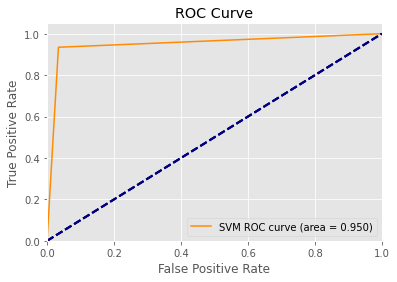

In [75]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(svc_predictions,y_test)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='SVM ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Model Comparison

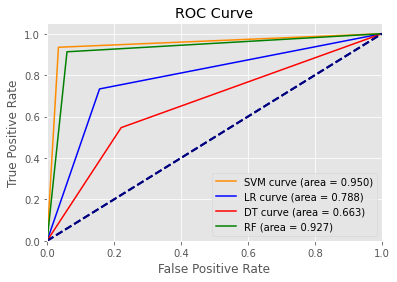

In [76]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(svc_predictions,y_test)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='SVM curve (area = %0.3f)' % roc_auc)
plt.plot(fp1, tpr_1, color='blue', label='LR curve (area = %0.3f)' % roc_auc_1)
plt.plot(fpr_2, tpr_2, color='red', label='DT curve (area = %0.3f)' % roc_auc_2)
plt.plot(fpr_3, tpr_3, color='green', label='RF (area = %0.3f)' % roc_auc_3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

It is clear to see that the SVM has the edge with a ``` 95.00% ``` overall model Accuracy and the worst performer was the decision tree with``` 63.00% ```. All models were run using the default hyperparameters. With further tuning 

# Hyperparameter Tuning Round

## Logistic Regression Hyperparameter Search

In [77]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Logistic Regreesion
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
max_iter = [500,1000,2000]

# Create a dictionary containing the grid of parameters to scan
grid = dict(solver=solvers,penalty=penalty,C=c_values,max_iter=max_iter)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# Summarise results 
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print('\n')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.801677 using {'C': 0.1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'newton-cg'}


0.790794 (0.043214) with: {'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'newton-cg'}
0.790794 (0.043214) with: {'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
0.791169 (0.043515) with: {'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
0.790794 (0.043214) with: {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
0.790794 (0.043214) with: {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
0.791169 (0.043515) with: {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
0.790794 (0.043214) with: {'C': 100, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'newton-cg'}
0.790794 (0.043214) with: {'C': 100, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'lbfgs'}
0.791169 (0.043515) with: {'C': 100, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}
0.790794 (0.043214) with: {'C': 10, 'max_iter': 500, 'penalty': 'l2',

## Support Vector Machine Hyperparameter Tuning 

In [78]:
# Hyperparameter tuning for Support Vector Machine
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# Create a dictionary containing the grid of parameters to scan
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.823421 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.816671 (0.041270) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.804294 (0.035393) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.566190 (0.092893) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.818910 (0.034921) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.820042 (0.036267) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.548957 (0.080054) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.809895 (0.037440) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.823421 (0.036295) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.613764 (0.045603) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.781814 (0.045795) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.799800 (0.041274) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.634772 (0.035172) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.658401 (0.039330) with: {'C': 0.01, 'gamma': 'scale',

# Random Forest Hyperparameter Tuning

In [79]:
# Hyperparameter tuning for Random Forest Classifier
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# Create a dictionary and grid of parameters to scan
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=rf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.803520 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.797153 (0.040867) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.803145 (0.046534) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.803520 (0.045528) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.797153 (0.040867) with: {'max_features': 'log2', 'n_estimators': 10}
0.803145 (0.046534) with: {'max_features': 'log2', 'n_estimators': 100}
0.803520 (0.045528) with: {'max_features': 'log2', 'n_estimators': 1000}


## Submission

In [80]:
submission = pd.DataFrame({'PassengerId':test_ids,'Survived':svc_predictions})

**Saving Submission**

In [81]:
submission.to_csv("./submission.csv", index=False)